# Auto_MPG



*   mpg : 연비
*   cylinders : 실린더 수
*   displacement : 배기량
*   horsepower : 마력(출력)
*   weight : 차 무게
*   acceleration : 가속능력
*   model year : 출시연도
*   origin : 제조국 (1(USA), 2(EU), 3(JPN))
*   name : 모델명









In [1]:
#! pip install ucimlrepo

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler

In [3]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
auto_mpg = fetch_ucirepo(id=9)

# data (as pandas dataframes)
X = auto_mpg.data.features
y = auto_mpg.data.targets

# metadata
print(auto_mpg.metadata)

# variable information
print(auto_mpg.variables)

{'uci_id': 9, 'name': 'Auto MPG', 'repository_url': 'https://archive.ics.uci.edu/dataset/9/auto+mpg', 'data_url': 'https://archive.ics.uci.edu/static/public/9/data.csv', 'abstract': 'Revised from CMU StatLib library, data concerns city-cycle fuel consumption', 'area': 'Other', 'tasks': ['Regression'], 'characteristics': ['Multivariate'], 'num_instances': 398, 'num_features': 7, 'feature_types': ['Real', 'Categorical', 'Integer'], 'demographics': [], 'target_col': ['mpg'], 'index_col': ['car_name'], 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1993, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C5859H', 'creators': ['R. Quinlan'], 'intro_paper': None, 'additional_info': {'summary': 'This dataset is a slightly modified version of the dataset provided in the StatLib library.  In line with the use by Ross Quinlan (1993) in predicting the attribute "mpg", 8 of the original instances were removed because they had unknown values for th

In [4]:
import pandas as pd

mpg_data = pd.read_csv('/content/drive/MyDrive/SKT FLT AI Challenger/Day 5/auto+mpg/auto-mpg.data')

In [5]:
mpg_data

,"18.0 8 307.0 130.0 3504. 12.0 70 1\t""chevrolet chevelle malibu"""
0,15.0 8 350.0 165.0 3693. 11...
1,18.0 8 318.0 150.0 3436. 11...
2,16.0 8 304.0 150.0 3433. 12...
3,17.0 8 302.0 140.0 3449. 10...
4,15.0 8 429.0 198.0 4341. 10...
...,...
392,27.0 4 140.0 86.00 2790. 15...
393,44.0 4 97.00 52.00 2130. 24...
394,32.0 4 135.0 84.00 2295. 11...
395,28.0 4 120.0 79.00 2625. 18...


In [18]:
column_names = ["mpg", "cylinders", "displacement", "horsepower", "weight", "acceleration", "model year", "origin", "car name"]
mpg_data = pd.read_csv('/content/drive/MyDrive/SKT FLT AI Challenger/Day 5/auto+mpg/auto-mpg.data', delim_whitespace=True, names=column_names, na_values="?")
mpg_data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.0,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.0,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.0,2625.0,18.6,82,1,ford ranger



Mean Squared Error: 14.89
R^2 Score: 0.72


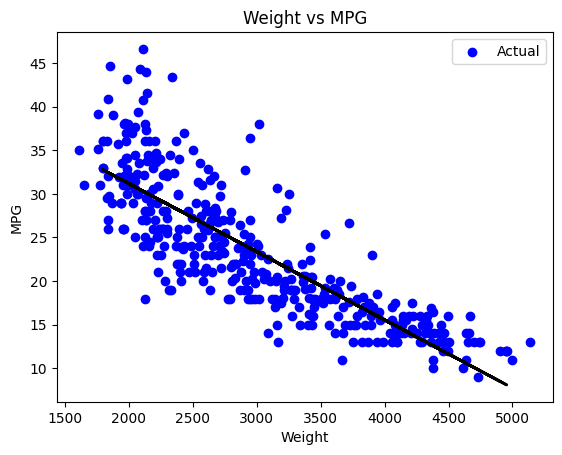

In [7]:
# weight vs mpg

X = mpg_data['weight'].values.reshape(-1, 1)
y = mpg_data['mpg'].values


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nMean Squared Error: {:.2f}".format(mse))
print("R^2 Score: {:.2f}".format(r2))

plt.scatter(X, y, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='black', linewidth=2)
plt.xlabel('Weight')
plt.ylabel('MPG')
plt.title('Weight vs MPG')
plt.legend()
plt.show()

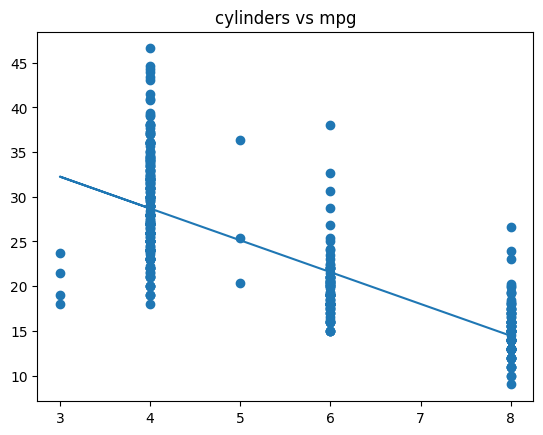

In [8]:
# cylinders vs mpg

data_y = mpg_data['mpg'].to_numpy()
data_x = mpg_data[['cylinders']].to_numpy()

# minmax_scaler = MinMaxScaler()
# data_x = minmax_scaler.fit_transform(data_x)
data_x = data_x.reshape(-1,1)
model = LinearRegression()
model.fit(data_x, data_y)

pred = model.predict(data_x)

plt.title('cylinders vs mpg')
plt.scatter(data_x,data_y)
plt.plot(data_x, pred)
plt.show()

,mpg,origin
mpg,1.00000,0.56271
origin,0.56271,1.00000


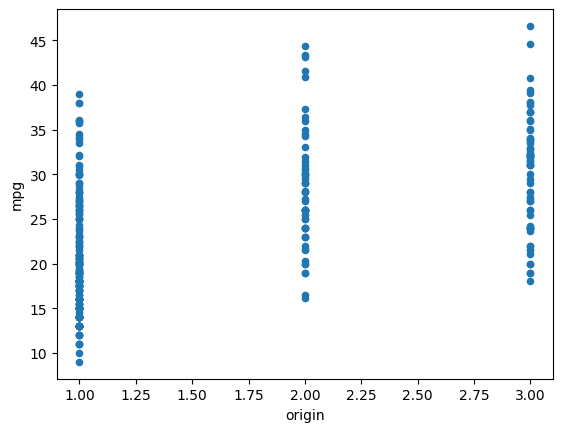

In [9]:
# origin vs mpg

mpg_data = mpg_data[['mpg', 'origin']]

train_set, test_set = train_test_split(mpg_data, test_size=0.2, random_state=42)
mpg_data_copy = train_set.copy()

mpg_data_copy.plot.scatter(x='origin', y='mpg')

mpg_data_copy.corr()

Coefficients:  [4.45558746]
Intercept:  23.60817610062893


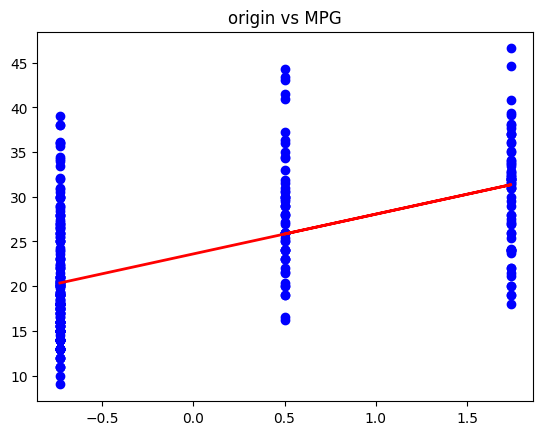

In [10]:
# origin vs mpg
from sklearn.preprocessing import StandardScaler

# 선형
train_x = train_set.drop(["mpg"], axis=1)
train_y = mpg_data_copy["mpg"]

scaler = StandardScaler()
train_x = scaler.fit_transform(train_x)

lin_reg = LinearRegression()

lin_reg.fit(train_x, train_y)

print("Coefficients: ", lin_reg.coef_)
print("Intercept: ", lin_reg.intercept_)

plt.title('origin vs MPG')
plt.scatter(train_x, train_y,  color='blue')
train_y_hat = lin_reg.predict(train_x)
plt.plot(train_x,train_y_hat, color='red', linewidth=2)

In [19]:
car_name = mpg_data['car name']
car_name.values.tolist

<function ndarray.tolist>

In [20]:
car_name = set(car_name)
car_name

{'amc ambassador brougham',
 'amc ambassador dpl',
 'amc ambassador sst',
 'amc concord',
 'amc concord d/l',
 'amc concord dl',
 'amc concord dl 6',
 'amc gremlin',
 'amc hornet',
 'amc hornet sportabout (sw)',
 'amc matador',
 'amc matador (sw)',
 'amc pacer',
 'amc pacer d/l',
 'amc rebel sst',
 'amc spirit dl',
 'audi 100 ls',
 'audi 100ls',
 'audi 4000',
 'audi 5000',
 'audi 5000s (diesel)',
 'audi fox',
 'bmw 2002',
 'bmw 320i',
 'buick century',
 'buick century 350',
 'buick century limited',
 'buick century luxus (sw)',
 'buick century special',
 'buick electra 225 custom',
 'buick estate wagon (sw)',
 'buick lesabre custom',
 'buick opel isuzu deluxe',
 'buick regal sport coupe (turbo)',
 'buick skyhawk',
 'buick skylark',
 'buick skylark 320',
 'buick skylark limited',
 'cadillac eldorado',
 'cadillac seville',
 'capri ii',
 'chevroelt chevelle malibu',
 'chevrolet bel air',
 'chevrolet camaro',
 'chevrolet caprice classic',
 'chevrolet cavalier',
 'chevrolet cavalier 2-door'

In [21]:
mpg_data.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [22]:
# horsepower 결측치 column은 그냥 drop
mpg_data.dropna(subset=['horsepower', 'mpg'], inplace=True)
mpg_data.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [24]:
# 변수
x = mpg_data['horsepower']
y = mpg_data['mpg']

In [25]:
# 데이터 분할
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [26]:
# 선형 회귀 모델 생성 및 학습
mpg_model = LinearRegression()
mpg_model.fit(x_train.values.reshape(-1, 1), y_train)

LinearRegression()

In [27]:
# 모델 평가
train_score = mpg_model.score(x_train.values.reshape(-1, 1), y_train)
test_score = mpg_model.score(x_test.values.reshape(-1, 1), y_test)

print(f'Train R-squared: {train_score:.2f}')
print(f'Test R-squared: {test_score:.2f}')

Train R-squared: 0.61
Test R-squared: 0.57


In [28]:
# 한글 설치

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

plt.rc('font', family='NanumBarunGothic')

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

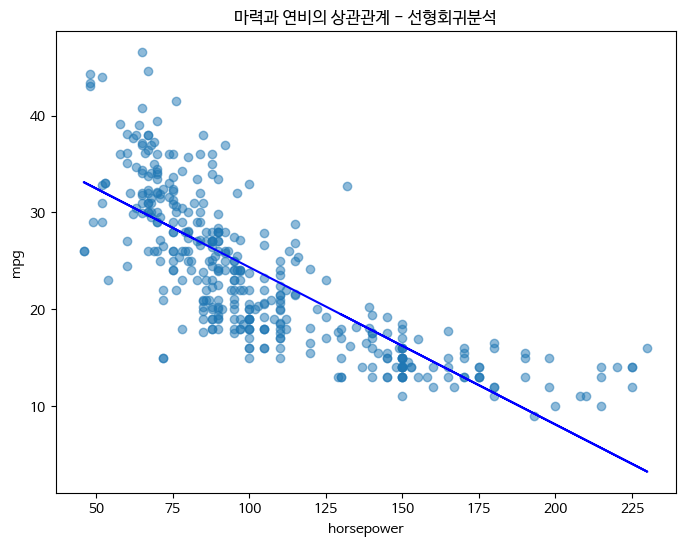

In [29]:
# 시각화
plt.figure(figsize=(8, 6))
plt.scatter(x, y, alpha=0.5)

plt.plot(x, mpg_model.predict(x.values.reshape(-1, 1)), color='b')

plt.xlabel('horsepower')
plt.ylabel('mpg')
plt.title('마력과 연비의 상관관계 - 선형회귀분석')

plt.show()